In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [138]:
df = pd.read_csv('Student_Performance.csv')

In [139]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [140]:
#drop unneccessary columns
df.drop(columns=["Extracurricular Activities","Sample Question Papers Practiced","Sleep Hours"],axis=1,inplace=True)

In [141]:
#check null values
df.isnull().sum()

Hours Studied        0
Previous Scores      0
Performance Index    0
dtype: int64

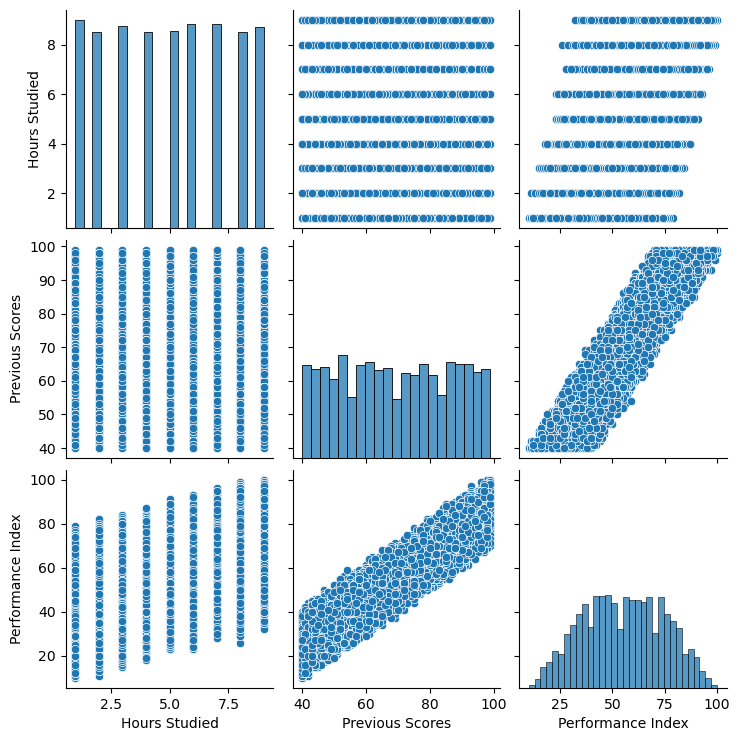

In [142]:
#visualization
import seaborn as sns
sns.pairplot(df)

In [143]:
df.corr()

,Hours Studied,Previous Scores,Performance Index
Hours Studied,1.00000,-0.012390,0.373730
Previous Scores,-0.01239,1.000000,0.915189
Performance Index,0.37373,0.915189,1.000000


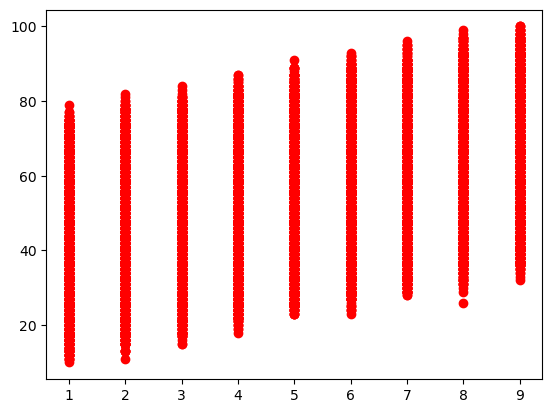

In [144]:
##visualise the data points more closely
plt.scatter(df['Hours Studied'],df["Performance Index"],color='r')

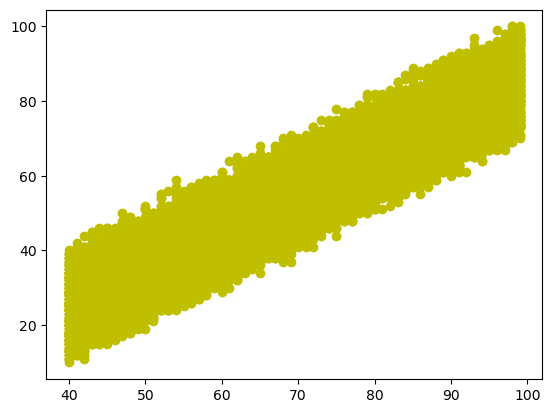

In [145]:
plt.scatter(df['Previous Scores'],df["Performance Index"],color='y')

In [146]:
#independent and dependent features
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [147]:
x

,Hours Studied,Previous Scores
0,7,99
1,4,82
2,8,51
3,5,52
4,7,75
...,...,...
9995,1,49
9996,7,64
9997,6,83
9998,9,97


In [148]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [149]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

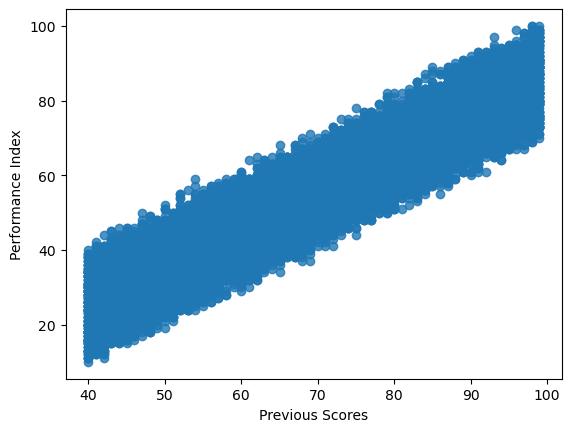

In [150]:
#for visualization 
sns.regplot(x=df['Previous Scores'],y=df['Performance Index'])

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

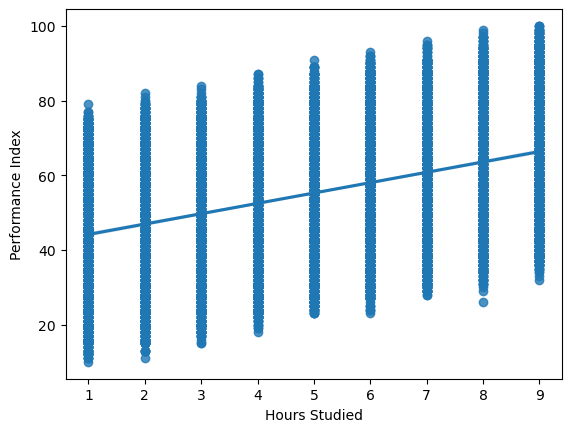

In [151]:
sns.regplot(x=df['Hours Studied'],y=df['Performance Index'])

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [154]:
x_train

array([[ 0.00796272, -1.19062085],
       [ 0.77854894,  1.05902612],
       [-0.76262349,  1.40512565],
       ...,
       [ 1.54913515, -1.24830411],
       [-1.5332097 , -1.30598737],
       [-1.14791659, -1.36367062]])

In [155]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [156]:
regression.fit(x_train,y_train)

LinearRegression()

In [176]:
print('Coefficient or slope:',regression.coef_)
print('Intercept:',regression.intercept_)

Coefficient or slope: [ 7.42690588 17.62854694]
Intercept: 55.41839999999999


In [157]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [158]:
np.mean(validation_score)

-5.22321479057648

In [159]:
##prediction
y_pred=regression.predict(x_test)

In [160]:
y_pred

array([55.46275053, 23.42074347, 48.03226574, ..., 67.65693432,
       55.62135599, 57.01929813])

In [161]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [162]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5.801591271290154
1.922272992709803
2.4086492628214167


In [163]:
#R square
from sklearn.metrics import r2_score

In [164]:
score = r2_score(y_test,y_pred)
print(score)

0.9842536191453857


In [165]:
#adjusted R squared
1- (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9842410069060147

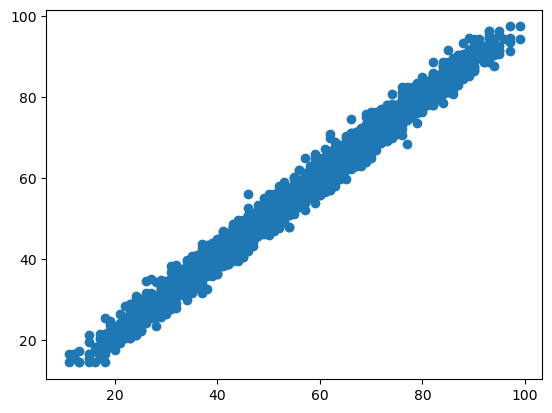

In [166]:
##Assumptions
plt.scatter(y_test,y_pred)

In [167]:
residuals = y_test-y_pred
print(residuals)

6252   -4.462751
4684   -3.420743
1731   -2.032266
4742   -2.915778
4521   -3.983720
          ...   
4862   -0.757241
7025   -2.582563
7647    2.343066
7161    0.378644
73     -5.019298
Name: Performance Index, Length: 2500, dtype: float64


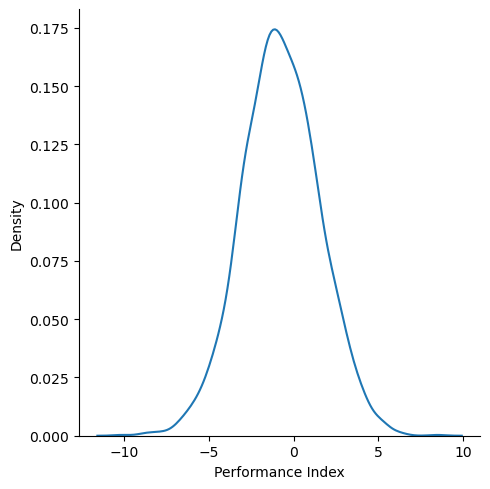

In [168]:
##plot this residuals
sns.displot(residuals,kind='kde')

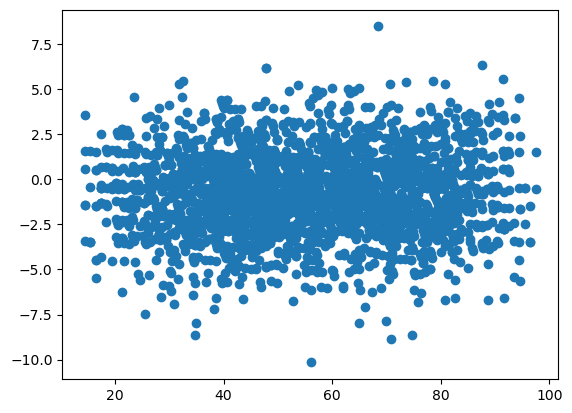

In [169]:
##scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [170]:
#OLS Linear Regression
import statsmodels.api as sm

In [171]:
model = sm.OLS(y_train,x_train).fit()

In [172]:
prediction = model.predict(x_test)
print(prediction)

[  0.04435053 -31.99765653  -7.38613426 ...  12.23853432   0.20295599
   1.60089813]


In [173]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.106
Method:                 Least Squares   F-statistic:                              443.5
Date:                Sun, 16 Mar 2025   Prob (F-statistic):                   9.12e-183
Time:                        15:50:25   Log-Likelihood:                         -40760.
No. Observations:                7500   AIC:                                  8.152e+04
Df Residuals:                    7498   BIC:                                  8.154e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [174]:
print(regression.coef_)

[ 7.42690588 17.62854694]


In [175]:
#prediction for new data 
regression.predict(scaler.transform([[7, 99]]))


c:\Users\33152\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([91.72809098])